In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from math import log
sns.set_style("whitegrid")

In [ ]:
GraphName = "04-10-22 RAC CECOSA Muestra 3" # MODIFICAR SOLO ESTE VALOR (Nombre del Gráfico)
GraphName

'04-10-22 RAC CECOSA Muestra 3'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 04-10-22 RAC CECOSA Obra Brown 3.TXT to 04-10-22 RAC CECOSA Obra Brown 3.TXT


In [ ]:
uploaded

{'04-10-22 RAC CECOSA Obra Brown 3.TXT': b'4/10/2022\t15:07:30.0\t76,7\r\n4/10/2022\t15:07:32.0\t77,5\r\n4/10/2022\t15:07:34.0\t79,0\r\n4/10/2022\t15:07:36.0\t78,5\r\n4/10/2022\t15:07:38.0\t78,1\r\n4/10/2022\t15:07:40.0\t79,1\r\n4/10/2022\t15:07:42.0\t79,1\r\n4/10/2022\t15:07:44.0\t76,7\r\n4/10/2022\t15:07:46.0\t76,2\r\n4/10/2022\t15:07:48.0\t77,7\r\n4/10/2022\t15:07:50.0\t77,7\r\n4/10/2022\t15:07:52.0\t77,5\r\n4/10/2022\t15:07:54.0\t77,2\r\n4/10/2022\t15:07:56.0\t79,0\r\n4/10/2022\t15:07:58.0\t80,1\r\n4/10/2022\t15:08:00.0\t77,7\r\n4/10/2022\t15:08:02.0\t79,0\r\n4/10/2022\t15:08:04.0\t79,8\r\n4/10/2022\t15:08:06.0\t79,8\r\n4/10/2022\t15:08:08.0\t80,6\r\n4/10/2022\t15:08:10.0\t81,7\r\n4/10/2022\t15:08:12.0\t81,4\r\n4/10/2022\t15:08:14.0\t81,7\r\n4/10/2022\t15:08:16.0\t82,1\r\n4/10/2022\t15:08:18.0\t80,5\r\n4/10/2022\t15:08:20.0\t80,7\r\n4/10/2022\t15:08:22.0\t81,3\r\n4/10/2022\t15:08:24.0\t81,1\r\n4/10/2022\t15:08:26.0\t80,1\r\n4/10/2022\t15:08:28.0\t79,9\r\n4/10/2022\t15:08:30.0\t79,8

In [ ]:
file_name = list(uploaded.keys())[0]
file_name

'04-10-22 RAC CECOSA Obra Brown 3.TXT'

In [ ]:
df = pd.read_csv("{}".format(file_name), delim_whitespace=True)
df.head()

,4/10/2022,15:07:30.0,"76,7"
0,4/10/2022,15:07:32.0,"77,5"
1,4/10/2022,15:07:34.0,"79,0"
2,4/10/2022,15:07:36.0,"78,5"
3,4/10/2022,15:07:38.0,"78,1"
4,4/10/2022,15:07:40.0,"79,1"


In [ ]:
df.columns = ['Fecha', 'Hora', 'dBA']
df.head()

,Fecha,Hora,dBA
0,4/10/2022,15:07:32.0,"77,5"
1,4/10/2022,15:07:34.0,"79,0"
2,4/10/2022,15:07:36.0,"78,5"
3,4/10/2022,15:07:38.0,"78,1"
4,4/10/2022,15:07:40.0,"79,1"


In [ ]:
df["Time"] = df["Fecha"] + " " + df["Hora"]
df.head()

,Fecha,Hora,dBA,Time
0,4/10/2022,15:07:32.0,"77,5",4/10/2022 15:07:32.0
1,4/10/2022,15:07:34.0,"79,0",4/10/2022 15:07:34.0
2,4/10/2022,15:07:36.0,"78,5",4/10/2022 15:07:36.0
3,4/10/2022,15:07:38.0,"78,1",4/10/2022 15:07:38.0
4,4/10/2022,15:07:40.0,"79,1",4/10/2022 15:07:40.0


In [ ]:
df.dtypes

Fecha    object
Hora     object
dBA      object
Time     object
dtype: object

In [ ]:
df = df.applymap(lambda x: str(x.replace(',','.')))

In [ ]:
df.head()

,Fecha,Hora,dBA,Time
0,4/10/2022,15:07:32.0,77.5,4/10/2022 15:07:32.0
1,4/10/2022,15:07:34.0,79.0,4/10/2022 15:07:34.0
2,4/10/2022,15:07:36.0,78.5,4/10/2022 15:07:36.0
3,4/10/2022,15:07:38.0,78.1,4/10/2022 15:07:38.0
4,4/10/2022,15:07:40.0,79.1,4/10/2022 15:07:40.0


In [ ]:
df['dBA'] = pd.to_numeric(df['dBA'])

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)

In [ ]:
df.dtypes

Fecha            object
Hora             object
dBA             float64
Time     datetime64[ns]
dtype: object

In [ ]:
df_2 = df.drop(columns=['Fecha', 'Time'])
df_2

,Hora,dBA
0,15:07:32.0,77.5
1,15:07:34.0,79.0
2,15:07:36.0,78.5
3,15:07:38.0,78.1
4,15:07:40.0,79.1
...,...,...
147,15:12:26.0,68.4
148,15:12:28.0,68.1
149,15:12:30.0,68.3
150,15:12:32.0,68.4


NIVEL EQUIVALENTE CONTINUO.

http://gcastro.webs.uvigo.es/PFC/Capitulo_uno_d.htm


https://www.fceia.unr.edu.ar/acustica/biblio/protoc-fiuba.pdf

https://www.cirrusresearch.co.uk/library/documents/ebooks/guia-terminologia-medicion-ruido.pdf

https://www.nti-audio.com/es/servicio/conocimientos/-como-se-miden-los-percentiles

In [ ]:
avg = df["dBA"].mean().round(2)
avg

73.58

In [ ]:
df.describe()

,dBA
count,152.000000
mean,73.582237
std,5.142230
min,67.700000
25%,68.500000
50%,71.050000
75%,78.200000
max,82.100000


In [ ]:
samples = df["dBA"].count()
samples

152

In [ ]:
hora_inicio = df["Hora"][0]
hora_inicio

'15:07:32.0'

In [ ]:
hora_fin = df["Hora"][samples-1]
hora_fin

'15:12:34.0'

In [ ]:
Lmax = df["dBA"].max()
Lmax

82.1

In [ ]:
Lmin = df["dBA"].min()
Lmin

67.7

In [ ]:
L90 = df["dBA"].quantile(0.1)
L90

68.3

In [ ]:
L95 = df["dBA"].quantile(0.05)
L95

67.855

In [ ]:
L05 = df["dBA"].quantile(0.95)
L05

80.7

In [ ]:
L10 = df["dBA"].quantile(0.9)
L10

80.08999999999999

In [ ]:
L50 = df["dBA"].quantile(0.5)
L50

71.05000000000001

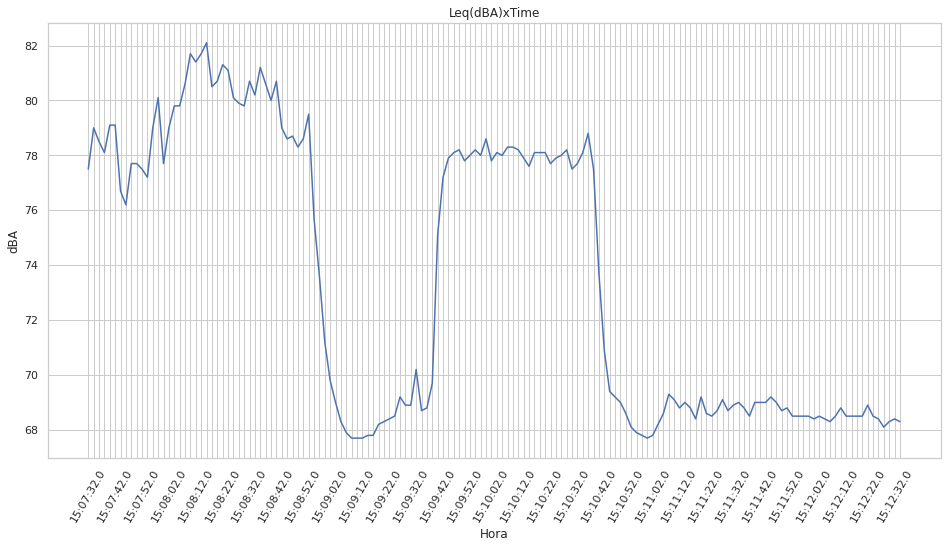

In [ ]:
ax = sns.lineplot(data=df_2, x=df_2["Hora"], y="dBA", sort=True)
sns.set(style="ticks", rc={'figure.figsize':(16,2)})
ax.tick_params(axis='x', rotation=60)
plt.title("Leq(dBA)xTime")
for index, label in enumerate(ax.get_xticklabels()):
  if index % 5 == 0:
    label.set_visible(True)
  else:
    label.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

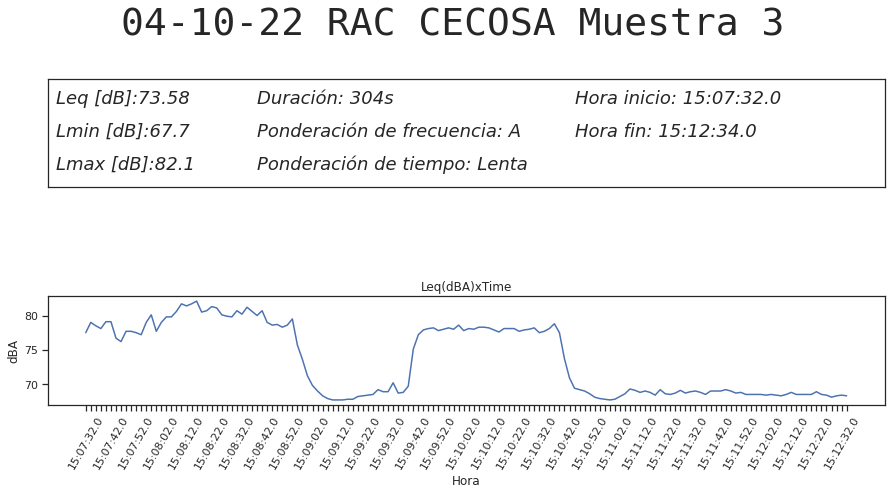

In [ ]:

fig = plt.figure(figsize=(15, 10))
rows = 3
cols = 1
grid = plt.GridSpec(rows, cols, wspace=0.4, hspace=1)

fig_ax1 = fig.add_subplot(grid[0, 0])
plt.axis([0, 10, 0, 10])

plt.tick_params(left = False, bottom = False)

#For x-axis
fig_ax1.axes.xaxis.set_visible(False)

#For y-axis
fig_ax1.axes.yaxis.set_visible(False)

#Box Text
avg_dB_txt = ("Leq [dB]:{}".format(avg))
min_dB_txt = ("Lmin [dB]:{}".format(Lmin))
max_dB_txt = ("Lmax [dB]:{}".format(Lmax))
duracion = ("Duración: {}s".format(samples*2))
pond_freq = ("Ponderación de frecuencia: A")
pond_t = ("Ponderación de tiempo: Lenta")
hora_inicio_txt = ("Hora inicio: {}".format(hora_inicio))
hora_fin_txt = ("Hora fin: {}".format(hora_fin))

plt.text(0.1, 9, avg_dB_txt, fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)
plt.text(0.1, 6, min_dB_txt, fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)
plt.text(0.1, 3, max_dB_txt, fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)

plt.text(2.5, 9,duracion , fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)
plt.text(2.5, 6,pond_freq , fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)
plt.text(2.5, 3,pond_t , fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)

plt.text(6.3, 9,hora_inicio_txt , fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)
plt.text(6.3, 6,hora_fin_txt , fontsize=18, style='oblique', ha='left',
         va='top', wrap=True)

#Graph LeqxTime
sns.set(style="ticks", rc={'figure.figsize':(16,8)})
fig_ax2 = fig.add_subplot(grid[1, 0])
fig_ax2.tick_params(axis='x', rotation=60)
fig_ax2 = sns.lineplot(data=df_2, x="Hora", y="dBA", sort=True)
plt.title("Leq(dBA)xTime")
for index, label in enumerate(fig_ax2.get_xticklabels()):
  if index % 5 == 0:
    label.set_visible(True)
  else:
    label.set_visible(False)


fig.suptitle('{}'.format(GraphName), fontsize=38, family='monospace')
plt.savefig('Gráfico y Datos {}.png'.format(GraphName), bbox_inches = 'tight')
files.download('Gráfico y Datos {}.png'.format(GraphName))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

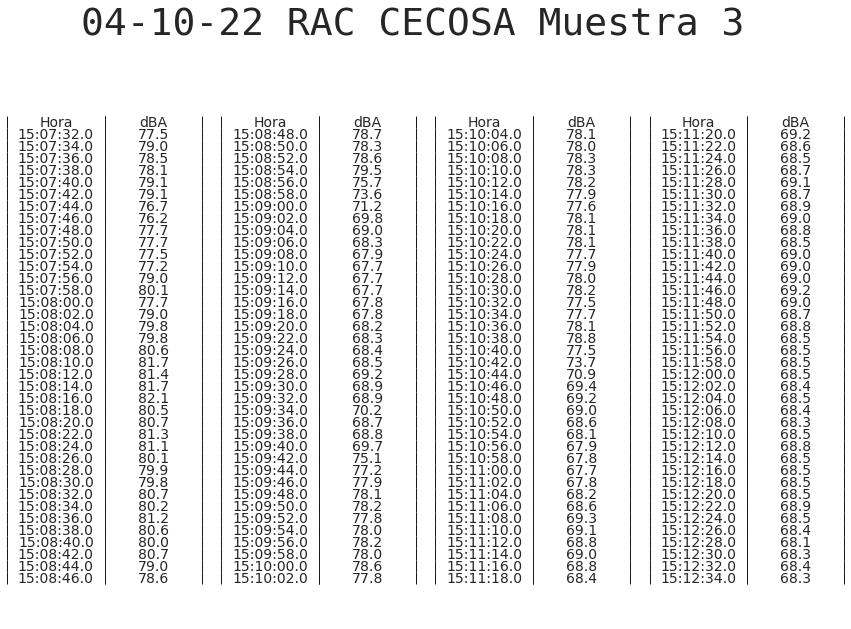

In [ ]:
#Grid
fig2 = plt.figure(figsize=(15, 10))
rows = 1
cols = 4
grid = plt.GridSpec(rows, cols, wspace=0.1, hspace=0.1)

#Variables
first_cuart = round(samples/4)
second_cuart = round(samples/2)
third_cuart = round((samples*3)/4)
fourth_cuart = round(samples)

#Table

#Column 1
fig2_ax1 = fig2.add_subplot(grid[0, 0])
fig2_ax1.set_axis_off()                  #turn off ticks
ncol = 2                                #table columns
nrow = samples/4                          #table rows

fig2_ax1_table = fig2_ax1.table(cellText=df_2.values[:first_cuart], colLabels=df_2.columns, loc='center', cellLoc='center', edges='vertical')
fig2_ax1_table       
fig2_ax1_table.set_fontsize(50)
#fig2_ax1_table.scale(2, 5)

#Column 2
fig2_ax2 = fig2.add_subplot(grid[0, 1])
fig2_ax2.set_axis_off()                  #turn off ticks
ncol = 2                                #table columns
nrow = samples/4                          #table rows

fig2_ax2_table = fig2_ax2.table(cellText=df_2.values[first_cuart:second_cuart], colLabels=df_2.columns, loc='center', cellLoc='center', edges='vertical') 
fig2_ax2_table
fig2_ax2_table.set_fontsize(50)
#fig2_ax2_table.scale(2, 5)

#Column 3
fig2_ax3 = fig2.add_subplot(grid[0, 2])
fig2_ax3.set_axis_off()                  #turn off ticks
ncol = 2                                #table columns
nrow = samples/4                          #table rows

fig2_ax3_table = fig2_ax3.table(cellText=df_2.values[second_cuart:third_cuart], colLabels=df_2.columns, loc='center', cellLoc='center', edges='vertical')
fig2_ax3_table
fig2_ax3_table.set_fontsize(50)
#fig2_ax3_table.scale(2, 5)

#Column 4
fig2_ax4 = fig2.add_subplot(grid[0, 3])
fig2_ax4.set_axis_off()                  #turn off ticks
ncol = 2                                #table columns
nrow = samples/4                          #table rows

fig2_ax4_table = fig2_ax4.table(cellText=df_2.values[third_cuart:], colLabels=df_2.columns, loc='center', cellLoc='center', edges='vertical', fontsize=60)
fig2_ax4_table
fig2_ax4_table.set_fontsize(50)
#fig2_ax4_table.scale(2, 5)

fig2.suptitle('{}'.format(GraphName), fontsize=38, family='monospace')
plt.savefig('Samples {}.png'.format(GraphName),bbox_inches = 'tight' )
files.download('Samples {}.png'.format(GraphName))
plt.show()